## Data Cleaning and Exploration

### Loading Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [2]:
#Required text pre-processing libraries are imported
import string
import nltk
import re

# download the stopwords and wordnet corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
# import tokenize from nltk library
from nltk import tokenize
# import WordNetLemmatizer from nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer


#Required data visualisation libraries are imported
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading in Dataset

In [3]:
df = pd.read_csv('./data/Womens Clothing E-Commerce Reviews 2.csv')

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


### Initial Data Cleaning

In [6]:
#checking my initial data types and null counts

In [7]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
#droping rows that do not contain review text; only about 3.6% of data

In [9]:
df = df[df['Review Text'].isna()==False]

In [10]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [11]:
#currently at 22,641 columns

In [12]:
#dropping addditional index column

In [13]:
df.drop(columns='Unnamed: 0', inplace=True)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
#Checking for any duplicated reviews

In [15]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [16]:
df[df.Title.isna()==True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses
30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants
36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts
...,...,...,...,...,...,...,...,...,...,...
23425,430,23,NaN,A great long line bra! beautiful and well made...,4,1,1,Initmates,Intimate,Intimates
23435,262,26,NaN,Love the pattern. the pants are really cute! p...,4,1,0,General Petite,Intimate,Lounge
23450,964,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets
23453,1104,39,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea...",4,1,0,General Petite,Dresses,Dresses


In [17]:
#although there are many NaNs in the "Title" column, we will not be utilizng this column for classification; will keep
#these rows since they contain "Review Text" content

In [18]:
df[df['Division Name'].isna()==True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN
21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN


In [19]:
#although these rows are all missing Division Name, Department Name, and Class Name, they contain
#Review Text so I will keep these rows

In [20]:
#checking for any duplicated reviews

In [21]:
df.duplicated().value_counts()

False    22640
True         1
dtype: int64

In [22]:
#it looks like there is one duplicate entry; locating that entry

In [23]:
df[df.duplicated() == True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans


In [24]:
#dropping the duplicated review

In [25]:
df.drop(21888, inplace=True)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [27]:
#confirming df has one less row, drop was successful

### Initial Data Exploration

In [28]:
#quick plots of each column

In [29]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<ipython-input-29-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-29-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-29-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


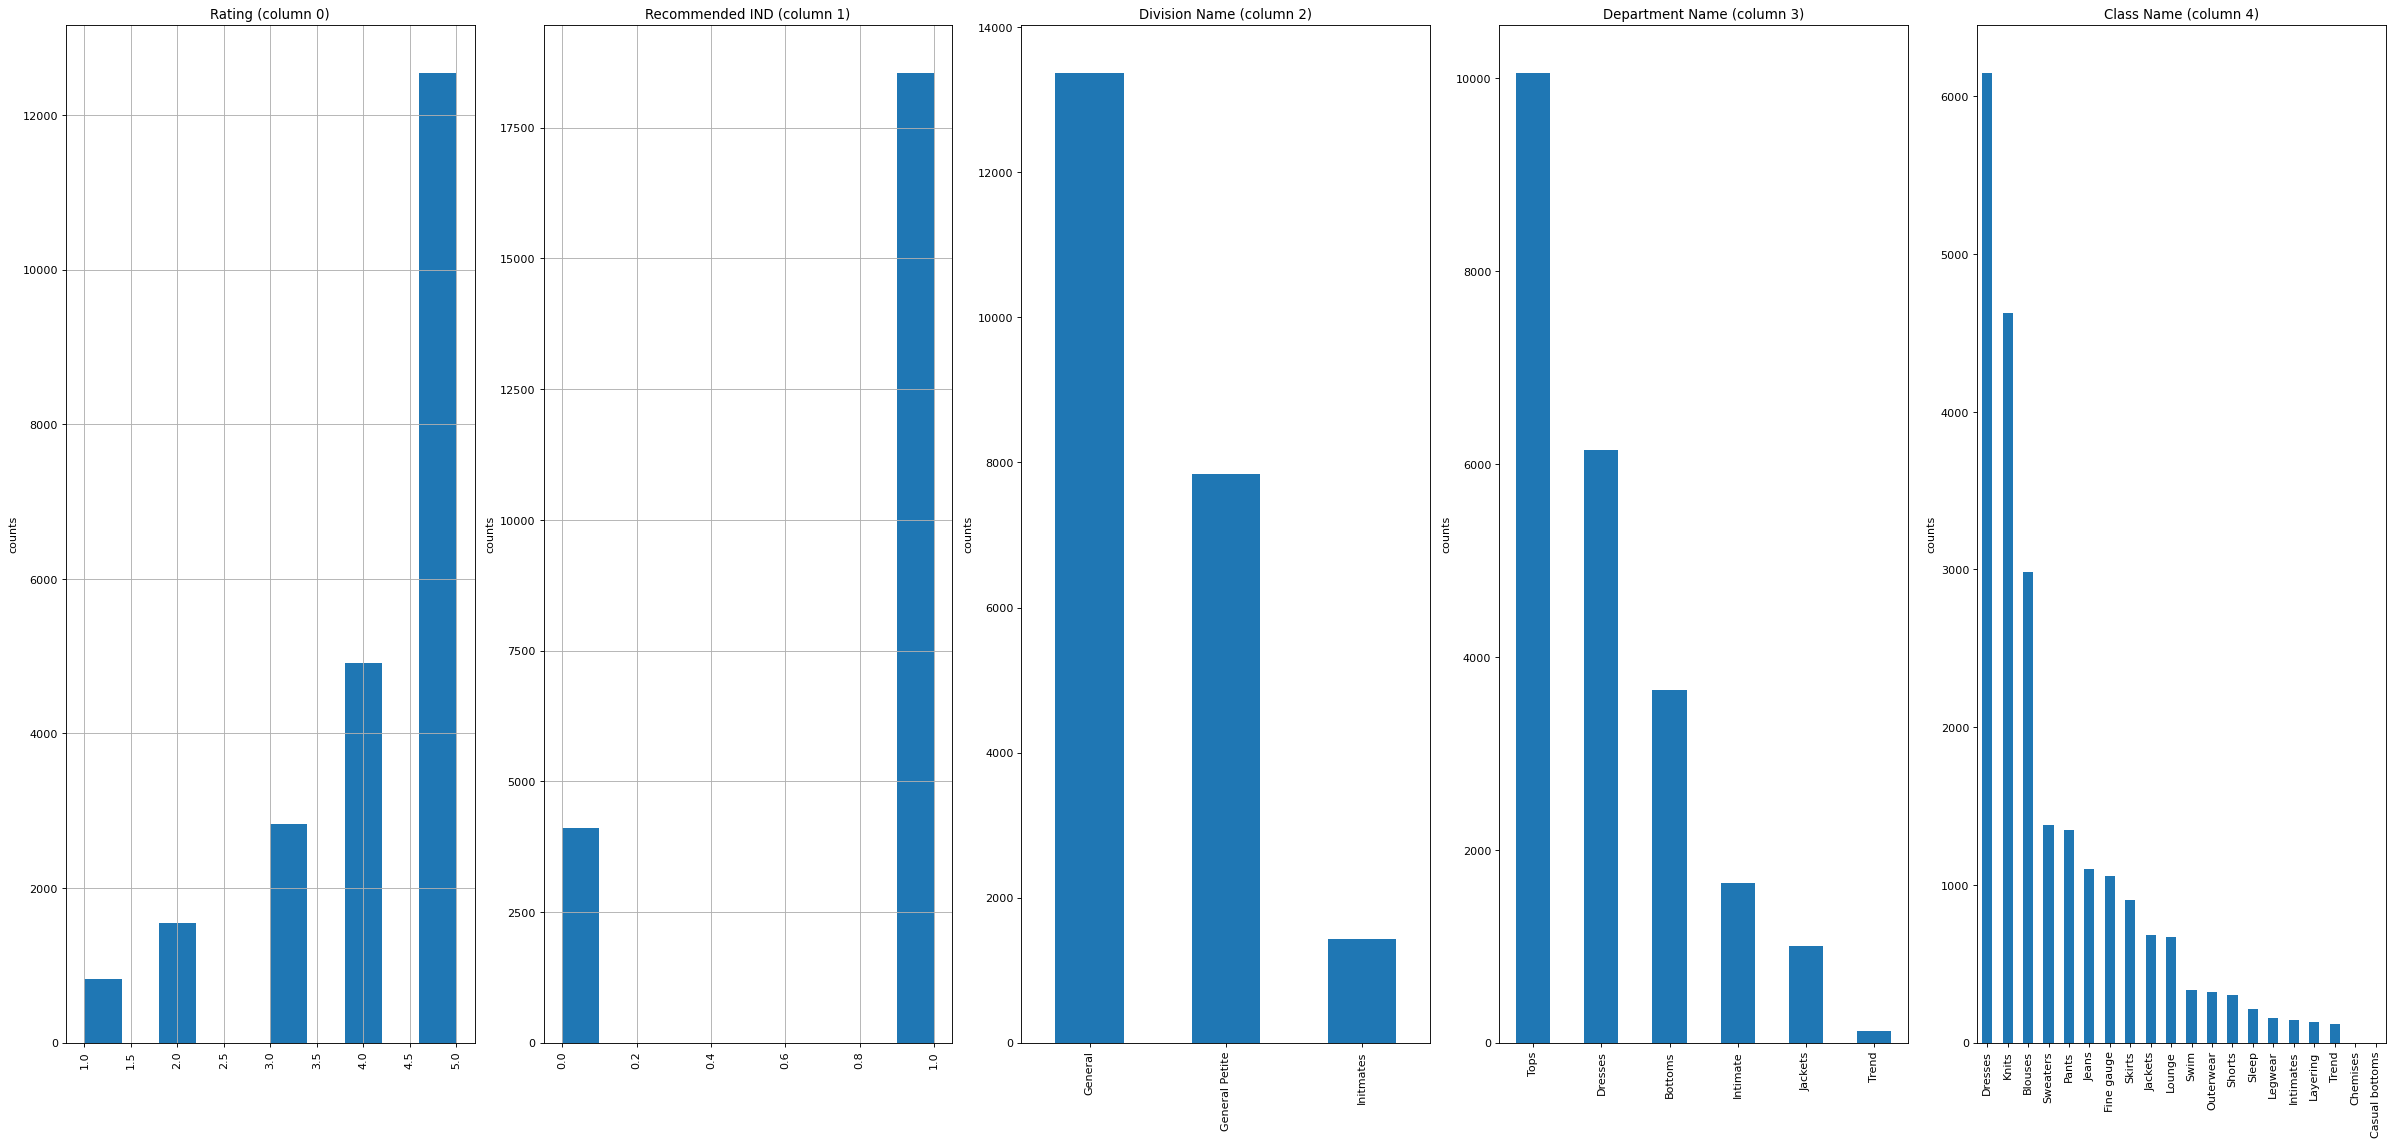

In [30]:
plotPerColumnDistribution(df, 10, 5)

In [31]:
#looking at distribution of age for background knowledge

In [32]:
df.Age.describe()

count    22640.000000
mean        43.280654
std         12.327181
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

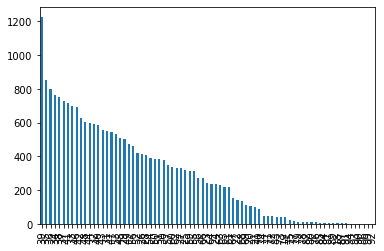

In [33]:
df.Age.value_counts().plot(kind='bar');

In [34]:
#looking at distribution of rating for background knowledge

In [35]:
df.Rating.describe()

count    22640.000000
mean         4.183525
std          1.115774
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [36]:
df.Rating.value_counts()

5    12539
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

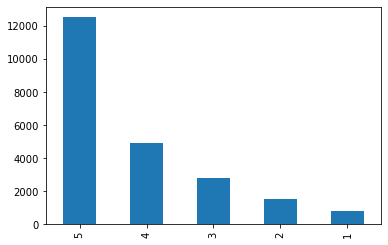

In [37]:
df.Rating.value_counts().plot(kind = 'bar');

In [38]:
#created better visualiztion for presentation purposes

In [39]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.io import to_image
init_notebook_mode(connected=True)

data = df['Rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Reviews'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 # Do this first so we don't create a file if image conversion fails
img_data = to_image(fig,
        format='png',
        width=800,
        height=500,
        scale=5)

fig.write_image("./images/reviews_distribution.png", scale=5)

In [40]:
#looking at distribution of Recommend Ind

In [41]:
df['Recommended IND'].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

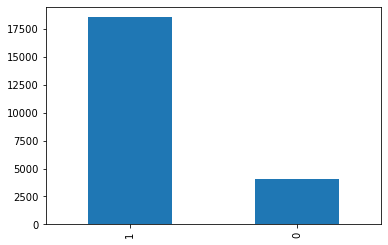

In [42]:
df['Recommended IND'].value_counts().plot(kind = 'bar');

In [43]:
#created better visualiztion for presentation purposes

In [44]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.io import to_image
init_notebook_mode(connected=True)

data = df['Recommended IND'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Reviews for Recommended or Not'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 # Do this first so we don't create a file if image conversion fails
img_data = to_image(fig,
        format='png',
        width=800,
        height=500,
        scale=5)

fig.write_image("./images/recommendedIND_distribution.png", scale=5)

In [45]:
#large skew in our data; most of our data is recommended and a high % of our data received a rating of "5"

In [46]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

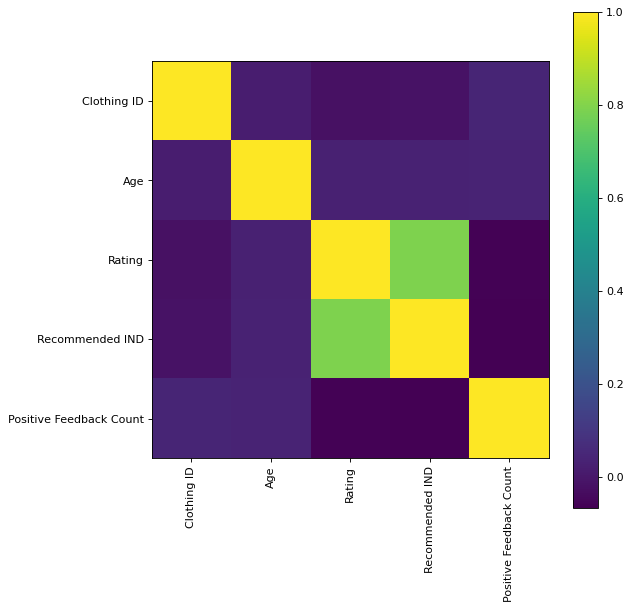

In [47]:
plotCorrelationMatrix(df, 8);

In [48]:
#would expect Recmomended IND and Rating to be positively correlated, which they are

In [49]:
#adding polarity and subjectivity column so I can visualize how these columns change after preprocessing

In [50]:
from textblob import TextBlob
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).polarity)
df['Subjective'] = df['Review Text'].apply(lambda x: TextBlob(x).subjectivity)

<ipython-input-50-237c8c806210>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-237c8c806210>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjective
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750


In [72]:
#Changing variables headers to remove spaces for modelling
df = df.rename(columns={'Clothing ID' : 'Clothing_ID', 'Review Text': 'Review_Text', 'Recommended IND': 'Recommended_IND', 'Positive Feedback Count':'Positive_Feedback_Count', 'Division Name': 'Division_Name', 'Class Name': 'Class_Name'})

In [ ]:
#creating new Target class called "Positive_Rating"; this will break up reviews into positive
#or negative sentiment, based on their rating
#for the purposes of this, a rating of 4-5 will be positive (1) and a rating of 1-3 will be
#negative/neutral (2)

In [73]:
def target_label(row):
    if row['Rating'] == 4:
      return 1
    elif row['Rating'] == 5:
        return 1
    else:
        return 0

In [74]:
df['Positive_Rating'] = df.apply(lambda row: target_label(row), axis=1)

In [75]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean,String,Polarity_Clean,Subjective_Clean,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.633333,0.933333,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.318750,0.725000,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,"[high, hope, dress, really, wanted, work, init...",high hope dress really wanted work initially o...,0.079865,0.349762,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,"[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,0.500000,0.625000,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,"[shirt, very, flattering, due, adjustable, fro...",shirt very flattering due adjustable front tie...,0.393750,0.568750,1


In [68]:
#looking at the imbalance between sentiments and recommended based on rating

In [78]:
df[df["Positive_Rating"] != df["Recommended_IND"]]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean,String,Polarity_Clean,Subjective_Clean,Positive_Rating
14,1077,50,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,3,1,1,General,Dresses,Dresses,-0.057143,0.517857,"[nice, choice, holiday, gathering, like, lengt...",nice choice holiday gathering like length graz...,-0.057143,0.517857,0
16,1065,34,"You need to be at least average height, or taller",Material and color is nice. the leg opening i...,3,1,2,General,Bottoms,Pants,0.134921,0.454762,"[material, color, nice, leg, opening, very, la...",material color nice leg opening very large len...,0.173469,0.556122,0
23,1077,34,"Like it, but don't love it.",Cute little dress fits tts. it is a little hig...,3,1,0,General,Dresses,Dresses,0.269286,0.634286,"[cute, little, dress, fit, tt, little, high, w...",cute little dress fit tt little high waisted g...,0.285625,0.605000,0
52,1104,39,NaN,"Love the color and style, but material snags e...",3,1,3,General,Dresses,Dresses,0.466667,0.716667,"[love, color, style, material, snag, easily]",love color style material snag easily,0.466667,0.716667,0
84,861,37,Casual & unique tee,I received this shirt in my typical xs and it ...,3,1,0,General Petite,Tops,Knits,0.089583,0.695000,"[received, shirt, typical, x, fit, perfectly, ...",received shirt typical x fit perfectly crazy l...,-0.060417,0.635000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23452,999,38,Full skirt,I ordered this skirt hoping i could wear it to...,3,1,1,General,Bottoms,Skirts,0.137500,0.450000,"[ordered, skirt, hoping, could, wear, work, lo...",ordered skirt hoping could wear work looked ta...,0.125000,0.450000,0
23462,999,24,Its okay,The pattern of this skirt is adorable and look...,3,1,0,General,Bottoms,Skirts,0.500000,0.560000,"[pattern, skirt, adorable, look, better, perso...",pattern skirt adorable look better person fabr...,0.500000,0.560000,0
23475,1104,41,Cute dress,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,0.296286,0.685143,"[cute, dress, waist, high, sleeve, tight, mayb...",cute dress waist high sleeve tight maybe diffe...,0.296286,0.685143,0
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,0.708333,"[reminds, maternity, clothes, soft, stretchy, ...",reminds maternity clothes soft stretchy shiny ...,0.191667,0.708333,0


In [83]:
df.Rating[df.Positive_Rating != df.Recommended_IND].value_counts()

3    1170
4     164
2      94
5      23
1      15
Name: Rating, dtype: int64

In [79]:
#we see there are 1,466 reviews where the person either recommended the product but did not rate it with a 4 or 5
#OR did NOT recommend the product, but rated it a 4 or 5

In [80]:
df[df["Positive_Rating"] != df["Recommended_IND"]][df.Rating == 1]

<ipython-input-80-8749bb45e440>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean,String,Polarity_Clean,Subjective_Clean,Positive_Rating
2427,939,39,NaN,Beautiful jacket and i got lots of compliments...,1,1,0,General,Tops,Sweaters,0.532500,0.726250,"[beautiful, jacket, got, lot, compliment, true...",beautiful jacket got lot compliment true size ...,0.420000,0.726250,0
2872,829,51,NaN,Very cute top. i went down a size because for ...,1,1,1,General Petite,Tops,Blouses,0.170205,0.452910,"[very, cute, top, went, size, little, large, b...",very cute top went size little large back tast...,0.235357,0.485714,0
5570,861,69,Great t,I love this t-shirt because it has the combina...,1,1,0,General,Tops,Knits,0.187500,0.587500,"[love, shirt, combination, elegance, relazatio...",love shirt combination elegance relazation sof...,0.187500,0.587500,0
6216,829,53,Traditional material in a new way,Love the movement of the blouse and how it fal...,1,1,0,General,Tops,Blouses,0.650000,0.675000,"[love, movement, blouse, fall, great, quality,...",love movement blouse fall great quality material,0.650000,0.675000,0
7740,872,44,Odd neckline,I loved the color and design until i tried it ...,1,1,0,General,Tops,Knits,-0.055952,0.598413,"[loved, color, design, tried, store, slender, ...",loved color design tried store slender build t...,0.013492,0.598413,0
7850,956,43,NaN,"This is so close to perfect, but there's a sea...",1,1,1,General Petite,Jackets,Jackets,-0.041319,0.441319,"[close, perfect, seam, middle, back, bother, m...",close perfect seam middle back bother match po...,-0.025000,0.463095,0
9877,1084,58,NaN,"I loved the dress, but just not dressy enough ...",1,1,5,General Petite,Dresses,Dresses,0.378333,0.625000,"[loved, dress, dressy, enough, rethinking, nee...",loved dress dressy enough rethinking needed ve...,0.365833,0.625000,0
10517,1110,44,Beautiful dress; so excited to wear it!!!,I saw this dress in the catalog and had to hav...,1,1,0,General,Dresses,Dresses,0.422222,0.631909,"[saw, dress, catalog, went, store, sold, order...",saw dress catalog went store sold order ship t...,0.380000,0.598718,0
13607,1075,48,Great dress,Such a great dress. fit is flattering. the sma...,1,1,0,General,Dresses,Dresses,0.138889,0.666667,"[great, dress, fit, flattering, small, v, cut,...",great dress fit flattering small v cut front b...,0.137500,0.687500,0
16194,1081,68,NaN,This is an extremely flattering dress. i could...,1,1,1,General Petite,Dresses,Dresses,0.001190,0.450595,"[extremely, flattering, dress, resist, buying,...",extremely flattering dress resist buying even ...,-0.009226,0.450595,0


In [82]:
#we see some user error where the sentiment is positive and it looks as though the user meant to rate a 5

In [81]:
df[df["Positive_Rating"] != df["Recommended_IND"]][df.Rating == 5]

<ipython-input-81-7be27ec2facc>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean,String,Polarity_Clean,Subjective_Clean,Positive_Rating
1333,836,25,"Cute shirt, but not for me",The blue lace with the white top underneath is...,5,0,0,General,Tops,Blouses,0.065000,0.520000,"[blue, lace, white, top, underneath, very, pre...",blue lace white top underneath very pretty unf...,0.065000,0.520000,1
3499,872,52,Love this top!,This top is one of my retailer faves! it is so...,5,0,2,General,Tops,Knits,0.243929,0.604048,"[top, one, retailer, faves, comfortable, love,...",top one retailer faves comfortable love qualit...,0.260819,0.585924,1
3863,1081,53,Love this dress,"I also have this dress in 3/4 sleeve, tegan tu...",5,0,0,General Petite,Dresses,Dresses,0.172222,0.444444,"[also, dress, sleeve, tegan, tunic, love, dres...",also dress sleeve tegan tunic love dress dressed,0.500000,0.600000,1
4409,1094,53,Too small and short for my age.,Very pretty but too short for my age. looks we...,5,0,0,General,Dresses,Dresses,0.229167,0.616667,"[very, pretty, short, age, look, well, made, g...",very pretty short age look well made green dre...,0.229167,0.616667,1
6532,1095,33,Stunning,This jumpsuit runs large so i sized down perfe...,5,0,0,General,Dresses,Dresses,0.394817,0.605635,"[jumpsuit, run, large, sized, perfectly, one, ...",jumpsuit run large sized perfectly one full si...,0.583469,0.711224,1
7443,941,64,A great long swtr w/ patch pockets!,I ordered my usual sz s during the promo. arri...,5,0,6,General,Tops,Sweaters,0.315278,0.590000,"[ordered, usual, sz, promo, arrived, yesterday...",ordered usual sz promo arrived yesterday fit p...,0.315278,0.590000,1
9161,1126,82,Houndstooth,This an absolutely beautiful quality stylish c...,5,0,0,General Petite,Jackets,Outerwear,0.230000,0.540000,"[absolutely, beautiful, quality, stylish, coat...",absolutely beautiful quality stylish coat faul...,0.230000,0.540000,1
9675,865,33,Love it!,I didn't realize how much i would love this. w...,5,0,0,General,Tops,Knits,0.272454,0.619815,"[realize, much, would, love, wore, work, day, ...",realize much would love wore work day got comp...,0.281190,0.671905,1
9685,828,47,Comfy,This shirt is like the best worn in flannel wi...,5,0,1,General,Tops,Blouses,0.399792,0.513333,"[shirt, like, best, worn, flannel, little, fem...",shirt like best worn flannel little feminine f...,0.409167,0.513333,1
11636,939,64,Beautiful,I've wondered abt this swtr but hesitated to o...,5,0,23,General,Tops,Sweaters,0.204167,0.412500,"[wondered, abt, swtr, hesitated, order, dolman...",wondered abt swtr hesitated order dolman sleev...,0.195000,0.345000,1


## Text Preprocessing

In [53]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750


In [54]:
#Created new column for Proprecessed text and converted Review_Text to string type

In [55]:
df["Clean"] = df["Review_Text"].astype(str)

In [56]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,Absolutely wonderful - silky and sexy and comf...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,Love this dress! it's sooo pretty. i happene...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,I had such high hopes for this dress and reall...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,"I love, love, love this jumpsuit. it's fun, fl..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,This shirt is very flattering to all due to th...


In [57]:
#Creating function to complete text preprocessing steps

In [58]:
# Need to remove capitalization and punctuation

# Create a tokenizer 
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(pattern)

# Create list of stopwords in English (language of the reviews)
# Remove "very" from the list of stopwords 
stopwords_list = stopwords.words("english")
# Remove "very" from the list of stopwords 
stopwords_list.remove("very")

# Create an instance of nltk's WordNetLemmatizer with the variable name `lemmatizer`
lemmatizer = WordNetLemmatizer()

In [64]:
def preprocess_text(text, tokenizer, stopwords_list, lemmatizer):
    # Standardize case (lowercase the text)
    lowered_text = text.lower()
    
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(lowered_text)
    
    # Remove stopwords using `stopwords_list` and removing punctuation and strings with non-alphabetic properties 
    stopped_tokens = [word for word in tokens if word not in stopwords_list and word not in string.punctuation and word.isalpha()]
    
    # Stem the tokenized text using `stemmer`
    lemmatized_text = [lemmatizer.lemmatize(token) for token in stopped_tokens]
    
    # Return the preprocessed text
    return lemmatized_text

In [60]:
# Apply the preprocess function to the entire review text
df['Clean'] = df['Clean'].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))


In [61]:
df

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,"[absolutely, wonderful, silky, sexy, comfortable]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,"[love, dress, sooo, pretty, happened, find, st..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,"[high, hope, dress, really, wanted, work, init..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,"[shirt, very, flattering, due, adjustable, fro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,0.710000,"[very, happy, snag, dress, great, price, very,..."
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,0.708333,"[reminds, maternity, clothes, soft, stretchy, ..."
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,0.596429,"[fit, well, top, very, see, never, would, work..."
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,0.577778,"[bought, dress, wedding, summer, cute, unfortu..."


In [62]:
# create new column from df_clean that converts list of tokens to a string.
df['String']=df["Clean"].str.join(" ")

In [63]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean,String
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,"[high, hope, dress, really, wanted, work, init...",high hope dress really wanted work initially o...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,"[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,"[shirt, very, flattering, due, adjustable, fro...",shirt very flattering due adjustable front tie...


In [66]:
#exploring how polarity and subjectivity change on the cleaned text strings

In [65]:
df['Polarity_Clean'] = df['String'].apply(lambda x: TextBlob(x).polarity)
df['Subjective_Clean'] = df['String'].apply(lambda x: TextBlob(x).subjectivity)

In [67]:
df

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean,String,Polarity_Clean,Subjective_Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.633333,0.933333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.318750,0.725000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,"[high, hope, dress, really, wanted, work, init...",high hope dress really wanted work initially o...,0.079865,0.349762
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,"[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,0.500000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,"[shirt, very, flattering, due, adjustable, fro...",shirt very flattering due adjustable front tie...,0.393750,0.568750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,0.710000,"[very, happy, snag, dress, great, price, very,...",very happy snag dress great price very easy sl...,0.640833,0.762500
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,0.708333,"[reminds, maternity, clothes, soft, stretchy, ...",reminds maternity clothes soft stretchy shiny ...,0.191667,0.708333
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,0.596429,"[fit, well, top, very, see, never, would, work...",fit well top very see never would worked glad ...,0.414286,0.596429
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,0.577778,"[bought, dress, wedding, summer, cute, unfortu...",bought dress wedding summer cute unfortunately...,0.416667,0.511111


## Distribution of Words

In [84]:
# Helper function to visualize the 10 most common words in each class.

def visualize_top_10(freq_dist, title):
    
    plt.rcParams.update({'font.size': 13})
    
    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots(figsize=(10,10))
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    plt.tight_layout()
    
    # Save png of image to images folder using title as filename
    #plt.savefig(f'./images/{title}', facecolor='white', dpi=500)


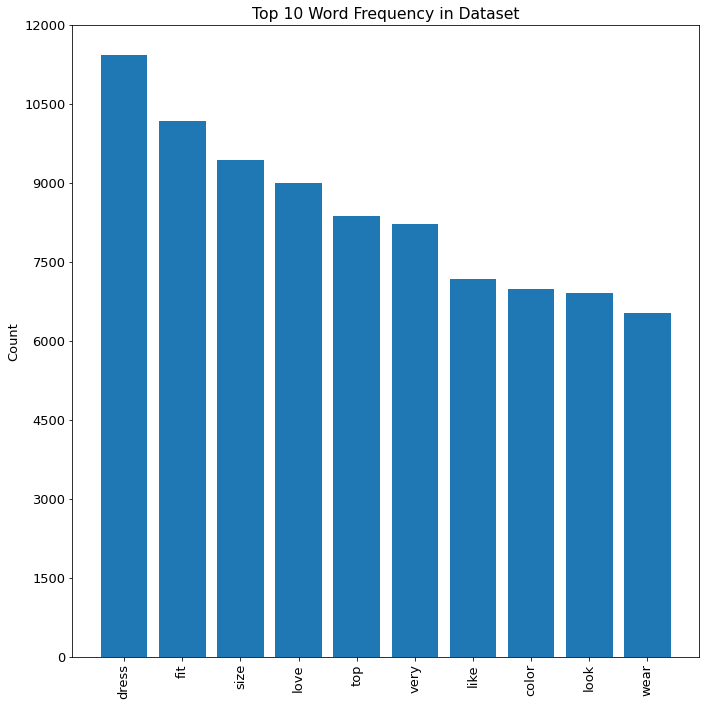

In [85]:
# Ten Most common words in the full dataset
sample_freq_dist = FreqDist(df.Clean.explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency in Dataset")

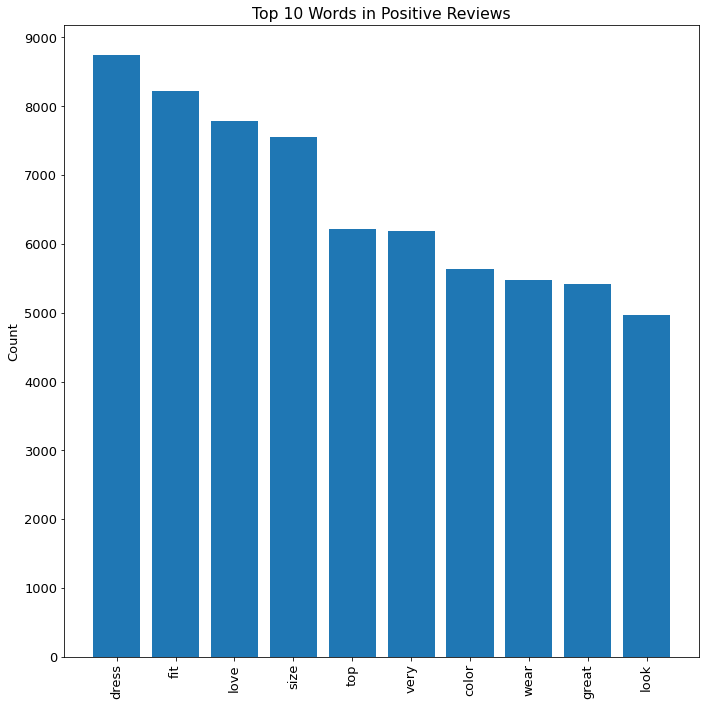

In [86]:
# Ten most common words appearing in positive reviews
pos_freq_dist = FreqDist(df['Clean'].loc[df['Positive_Rating'] == 1].explode())
visualize_top_10(pos_freq_dist, 'Top 10 Words in Positive Reviews')

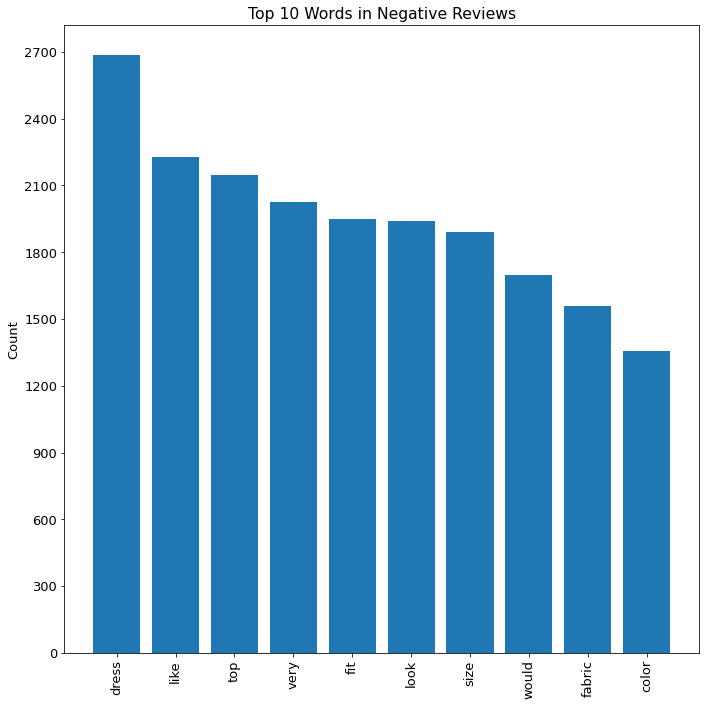

In [87]:
# Ten most common words appearing in negative reviews
neg_freq_dist = FreqDist(df['Clean'].loc[df['Positive_Rating'] == 0].explode())
visualize_top_10(neg_freq_dist, 'Top 10 Words in Negative Reviews')

We see a lot of overlap in top words in positive reviews and top words in negative reviews. I initially created two datasets, once which removed additional words that were seen frequently in both positive and negative reviews and one that did not remove any additional stop words. The data set that did not remove any additional stop words performed better across models, so for my final dataset I will not be removing any additional words based on overlap.

The following is the final list of words that were removed in addition to standard stop words in my other dataset:
    ['dress', 'fit', 'top', 'size', 'very', 'look', 'like', 'color', 'love', 'small']   

# Exploring Ngrams

## Bigrams using CountVectorizer

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(ngram_range=(2,2), max_features=2000)
# matrix of ngrams
ngrams = c_vec.fit_transform(df['String'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})


In [90]:
df_ngram

,frequency,bigram
0,1348,true size
1,1090,fit perfectly
2,902,look great
3,883,very flattering
4,806,look like
...,...,...
1995,29,bit see
1996,29,bit low
1997,29,beautiful look
1998,29,arm fit


In [91]:
df_ngram['polarity'] = df_ngram['bigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram'].apply(lambda x: TextBlob(x).subjectivity)

In [92]:
df_ngram

,frequency,bigram,polarity,subjective
0,1348,true size,0.35,0.65
1,1090,fit perfectly,0.70,0.70
2,902,look great,0.80,0.75
3,883,very flattering,0.20,0.30
4,806,look like,0.00,0.00
...,...,...,...,...
1995,29,bit see,0.00,0.00
1996,29,bit low,0.00,0.30
1997,29,beautiful look,0.85,1.00
1998,29,arm fit,0.40,0.40


## Bigrams using TfdifVectorizer


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
t_vec = TfidfVectorizer(ngram_range=(2,2), max_features=2000)
# matrix of ngrams
ngrams = t_vec.fit_transform(df['String'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = t_vec.vocabulary_
df_ngram_tvec = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})


In [94]:
df_ngram_tvec

,frequency,bigram
0,319.881671,true size
1,266.091141,fit perfectly
2,240.854591,look great
3,240.509140,very flattering
4,216.166458,look like
...,...,...
1995,10.900752,neckline very
1996,10.837878,medium usually
1997,10.806020,lb dress
1998,10.553096,large retailer


In [95]:
df_ngram_tvec['polarity'] = df_ngram_tvec['bigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_tvec['subjective'] = df_ngram_tvec['bigram'].apply(lambda x: TextBlob(x).subjectivity)

In [96]:
df_ngram_tvec

,frequency,bigram,polarity,subjective
0,319.881671,true size,0.350000,0.650000
1,266.091141,fit perfectly,0.700000,0.700000
2,240.854591,look great,0.800000,0.750000
3,240.509140,very flattering,0.200000,0.300000
4,216.166458,look like,0.000000,0.000000
...,...,...,...,...
1995,10.900752,neckline very,0.200000,0.300000
1996,10.837878,medium usually,-0.250000,0.250000
1997,10.806020,lb dress,0.000000,0.000000
1998,10.553096,large retailer,0.214286,0.428571


## Ngram Range of (1,2)

In [97]:
t_vec = TfidfVectorizer(ngram_range=(1,2), max_features=2000)
# matrix of ngrams
ngrams = t_vec.fit_transform(df['String'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = t_vec.vocabulary_
df_ngram_tvec = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'ngram'})

In [100]:
df_ngram_tvec[:50]

,frequency,ngram
0,981.611324,dress
1,791.249983,love
2,782.305179,fit
3,757.220717,top
4,756.846741,size
5,720.665864,very
6,638.077301,great
7,631.799511,color
8,621.405796,look
9,620.591384,like


In [101]:
df_ngram_tvec['polarity'] = df_ngram_tvec['ngram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_tvec['subjective'] = df_ngram_tvec['ngram'].apply(lambda x: TextBlob(x).subjectivity)

In [102]:
df_ngram_tvec.sort_values('polarity')[:25]

,frequency,ngram,polarity,subjective
1153,22.997233,awful,-1.000,1.000000
1222,21.929510,terrible,-1.000,1.000000
952,28.070029,very disappointed,-0.975,0.975000
1196,22.250652,hate,-0.800,0.900000
236,106.202088,disappointed,-0.750,0.750000
350,73.938202,bad,-0.700,0.666667
525,49.171199,cold,-0.600,1.000000
1408,19.074688,disappointment,-0.600,0.400000
1075,24.689121,crazy,-0.600,0.900000
1898,14.565990,cold water,-0.600,1.000000


In [103]:
df_ngram_tvec.sort_values('polarity')[-25:]

,frequency,ngram,polarity,subjective
599,43.989208,dress beautiful,0.85,1.00
321,80.354237,beautifully,0.85,1.00
1061,25.108565,absolutely beautiful,0.85,1.00
1315,20.529575,beautiful fabric,0.85,1.00
533,48.308012,incredibly,0.90,0.90
1310,20.601530,very good,0.91,0.78
1142,23.247867,wonderfully,1.00,1.00
757,35.595317,excellent,1.00,1.00
279,93.166559,best,1.00,0.30
1159,22.801838,would perfect,1.00,1.00


## Saving Final Dataset

In [105]:
df.to_csv('./data/final_data.csv', index=False)